In [3]:
!pip install wordcloud

In [4]:
!pip install pythainlp

  Using cached pythainlp-3.1.1-py3-none-any.whl (9.6 MB)


In [5]:
from wordcloud import WordCloud # ใช้ทำ Word Cloud
import pandas as pd # ใช้โหลดข้อมูลและสร้างข้อมูล
import matplotlib.pyplot as plt # ใช้ Visualize Word Cloud
from pythainlp.tokenize import word_tokenize # เป็นตัวตัดคำของภาษาไทย
from pythainlp.corpus import thai_stopwords # เป็นคลัง Stop Words ของภาษาไทย 

In [8]:
!pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 7.5 MB/s eta 0:00:00


In [22]:
df = pd.read_excel('all.xlsx')  
df

detail
0   วานนี้ (6 กันยายน) ที่ชุมชนโรงหวาย เขตสวนหลวง ...
1   ในปี 2565 ‘แสนสิริ’ มีพันธกิจใหญ่ โดยมีเป้าหมา...
2   กลายเป็นภาพที่ถูกแชร์กันในโลกออนไลน์เป็นวงกว้า...
3   วันนี้ (9 สิงหาคม) ธิดารัตน์ ยิ่งเจริญ ผู้อำนว...
4   ลำพังการศึกษา (Education) อาจไม่เพียงพอต่อการเ...
5   วันนี้ (7 เมษายน) ชัชชาติ สิทธิพันธุ์ ผู้สมัคร...
6   ช่วงเช้าวันนี้ (16 มกราคม) ที่สำนักงานเลขาธิกา...
7   วันที่ 27 ธันวาคม 2564 กองทุนเพื่อความเสมอภาคท...
8   ‘ความเหลื่อมล้ำ’ ถือเป็นปัญหาสำคัญของประชาชนไท...
9   จากกรณีมีการเผยแพร่เอกสารสัญญาซื้อขายโทรศัพท์ย...
10  ยอดผู้ติดเชื้อโควิดรายวันของไทยที่ ศบค. รายงาน...
11  วานนี้ (1 กรกฎาคม) พิธา ลิ้มเจริญรัตน์ ส.ส. บั...
12  วันนี้ (2 มิถุนายน) พิธา ลิ้มเจริญรัตน์ ส.ส. บ...
13  นพ.สุภกร บัวสาย ผู้จัดการกองทุนเพื่อความเสมอภา...
14  กองทุนเพื่อความเสมอภาคทางการศึกษา (กสศ.) ได้เป...
15  บอร์ด กสศ. อนุมัติมาตรการช่วยเหลือเด็ก เยาวชน ...
16  จากสถานการณ์การแพร่ระบาดของโรคโควิด-19 ในประเท...
17  ‘เด็กไทยกว่า 2,000,000 คน เสี่ยงหลุดออกจากระบบ...
18  “จำนวนเด็กยากจนพิเศษและเด็กยากจนทั่วไปตอนนี้ใน...
19  หลายคนอาจจะตั้งคำถามว่าเกิดอะไรขึ้นกับแรงงานหร...
20  น.ส.ตรีนุช เทียนทอง รมว.ศึกษาธิการ ได้มีนโยบาย...
21  เปิดภาคเรียนที่ 2/2565 นี้ ศธ.มุ่งเน้นให้ครูกร...
22  “ความยากจนข้ามรุ่น” และ “ความเหลื่อมล้ำทางการศ...
23  ร่วม MOU เดินหน้า "ระบบหลักประกันความเสมอภาคทา...
24  แนะหยุดวงจรความยากจนข้ามรุ่น ด้วยการพัฒนาระบบห...
25  เดินหน้าอบรมครู-ใช้แพลตฟอร์ม ร.ร.ห่างไกล ช่วยล...
26  ประเทศไทยยังให้ความสำคัญกับการลดความเหลื่อมล้ำ...
27  -เทศบาลเมืองอ่างทอง ผนึกกำลังครูค้นหาเด็กเสี่ย...
28  เนื่องจากสถานการณ์โควิด-19 ทำให้มีนักเรียนจำนว...
29  ข่าวเศรษฐกิจหลายเรื่องที่ออกมา ในช่วงนี้ มีหลา...
30  ตำรวจแจ้งข้อหาครูคนขับกับครูประจำรถตู้มรณะคร่า...
31  โดย สพฐ.ได้แก้ไขด้วยการเติมเต็มคุณภาพด้านการอ่...
32  ไม่ทราบว่าจะยังจำกันได้หรือไม่ ในช่วงท้ายๆของร...
33  “พรเพชร” ล้วงพระจากคอสาบานไม่ได้รับใบสั่งล่มรั...
34  ลุยแก้ "ความเหลื่อมล้ำทางการศึกษา" ดันเมืองต้น...
35  โควิด-19 ในช่วง 2 ปีที่ผ่านมา ส่งผลกระทบต่อผู้...
36  และ เอกชน เปิดตัว “3 พลังอาสาจังหวัดราชบุรี” ม...
37  เพื่อไทย ย้ำ ธุรกิจขายกัญชาผุดเป็นดอกเห็ด หลัง...
38  3 ป.เดินเกมสู้คู่ฟัด เป้าหลอกพลิกสูตรหาร 100 เ...
39  เมื่อวันที่ 5 ก.ค. น.ส.ตรีนุช เทียนทอง รมว.ศึก...
40  น.ส.ตรีนุช เทียนทอง รมว.ศึกษาธิการ กล่าวภายหลั...
41  จากการสำรวจก็ยังพบว่ามีเด็กอีกจำนวนหนึ่งไม่อยา...
42  ภาพรวมตั้งแต่เกิดปัญหาการระบาดของโรคโควิด-19 ม...
43  เลขาธิการ ป.ป.ช.ชี้ก่อนเส้นตาย 13 มิ.ย. ไม่ได้...
44  การบังคับใช้ พ.ร.บ.คุ้มครองข้อมูลส่วนบุคคล (พ....
45  การศึกษาของประเทศเป็นก้าวแรกที่จะช่วยพัฒนาทั้ง...
46  โครงการ “อาชีวะอยู่ประจำ เรียนฟรี มีอาชีพ” หรื...
47  ถึงวันนี้การแพร่ระบาดของโควิด-19 เหมือนจะเป็นข...
48  วรวรรต ศรีสอ้าน เปิดงาน “URBAN IN PROGRESS : O...
49  สายไฟยังตราตรึง!! นักแสดงฮอลลีวูดชื่อดัง รัสเซ...
50  น.ส.ตรีนุช เทียนทอง รมว.ศึกษาธิการ ลงพื้นที่ติ...
51  ออกนโยบายชัด ด้านเด็ก เยาวชน ทั้งใน และนอกระบบ...
52  สถานการณ์ “ความเหลื่อมล้ำทางการศึกษา” ในกรุงเท...

In [23]:
df['detail']

0     วานนี้ (6 กันยายน) ที่ชุมชนโรงหวาย เขตสวนหลวง ...
1     ในปี 2565 ‘แสนสิริ’ มีพันธกิจใหญ่ โดยมีเป้าหมา...
2     กลายเป็นภาพที่ถูกแชร์กันในโลกออนไลน์เป็นวงกว้า...
3     วันนี้ (9 สิงหาคม) ธิดารัตน์ ยิ่งเจริญ ผู้อำนว...
4     ลำพังการศึกษา (Education) อาจไม่เพียงพอต่อการเ...
5     วันนี้ (7 เมษายน) ชัชชาติ สิทธิพันธุ์ ผู้สมัคร...
6     ช่วงเช้าวันนี้ (16 มกราคม) ที่สำนักงานเลขาธิกา...
7     วันที่ 27 ธันวาคม 2564 กองทุนเพื่อความเสมอภาคท...
8     ‘ความเหลื่อมล้ำ’ ถือเป็นปัญหาสำคัญของประชาชนไท...
9     จากกรณีมีการเผยแพร่เอกสารสัญญาซื้อขายโทรศัพท์ย...
10    ยอดผู้ติดเชื้อโควิดรายวันของไทยที่ ศบค. รายงาน...
11    วานนี้ (1 กรกฎาคม) พิธา ลิ้มเจริญรัตน์ ส.ส. บั...
12    วันนี้ (2 มิถุนายน) พิธา ลิ้มเจริญรัตน์ ส.ส. บ...
13    นพ.สุภกร บัวสาย ผู้จัดการกองทุนเพื่อความเสมอภา...
14    กองทุนเพื่อความเสมอภาคทางการศึกษา (กสศ.) ได้เป...
15    บอร์ด กสศ. อนุมัติมาตรการช่วยเหลือเด็ก เยาวชน ...
16    จากสถานการณ์การแพร่ระบาดของโรคโควิด-19 ในประเท...
17    ‘เด็กไทยกว่า 2,000,000 คน เสี่ยงหลุดออกจาก

In [24]:
df['detail']= df['detail'].replace(to_replace='\xa0', regex=True, value='')

In [25]:
df['detail']= df['detail'].replace(to_replace='\u200b', regex=True, value='')

In [26]:
df['detail']= df['detail'].replace(to_replace='\n', regex=True, value='')

In [27]:
text = ''
for row in df.detail.values:       # ให้ python อ่านข้อมูลรีวิวจากทุก row ใน columns 'content'
    text = text + row.lower() + ' ' # เก็บข้อมูลรีวิวของเราทั้งหมดเป็น String ในตัวแปร text

In [28]:
wt = word_tokenize(text)

In [29]:
wt

['วาน',
 'นี้',
 ' ',
 '(',
 '6',
 ' ',
 'กันยายน',
 ')',
 ' ',
 'ที่',
 'ชุมชน',
 'โรง',
 'หวาย',
 ' ',
 'เขต',
 'สวน',
 'หลวง',
 ' ',
 'ศา',
 'นนท์',
 ' ',
 'หวัง',
 'สร้าง',
 'บุญ',
 ' ',
 'รอง',
 'ผู้ว่าราชการ',
 'กรุงเทพมหานคร',
 ' ',
 'พร้อมด้วย',
 ' ',
 'ไกร',
 'ยส',
 ' ',
 'ภัท',
 'รา',
 'วาท',
 ' ',
 'ผู้จัดการ',
 'กองทุน',
 'เพื่อ',
 'ความเสมอภาค',
 'ทาง',
 'การศึกษา',
 ' ',
 '(กส',
 'ศ.',
 ')',
 ' ',
 'ปิยะ',
 'วรรณ',
 ' ',
 'จ',
 'ระกา',
 ' ',
 'สมาชิกสภา',
 'กรุงเทพมหานคร',
 ' ',
 '(',
 'ส.ก.',
 ')',
 ' ',
 'เขต',
 'สวน',
 'หลวง',
 ' ',
 'ผู้บริหาร',
 'สำ',
 'นักการศึกษา',
 ' ',
 'และ',
 'ผู้เกี่ยวข้อง',
 'ร่วม',
 'ลง',
 'พื้นที่',
 'เพื่อ',
 'ค้นหา',
 'เด็กยากจน',
 'พิเศษ',
 'ใน',
 'ชุมชน',
 'ที่',
 'มี',
 'ความเสี่ยง',
 'หลุด',
 'จาก',
 'ระบบ',
 'การศึกษา',
 ' ',
 'เพื่อ',
 'ล.',
 '..',
 ' ',
 'ใน',
 'ปี',
 ' ',
 '2565',
 ' ',
 '‘',
 'แสน',
 'สิริ',
 '’',
 ' ',
 'มี',
 'พันธกิจ',
 'ใหญ่',
 ' ',
 'โดย',
 'มี',
 'เป้าหมาย',
 'ใน',
 'การ',
 'สนับสนุน',
 'กองทุน',
 'เพื่อ',


In [30]:
path = "thsarabunnew-webfont.ttf" # ตั้ง path ไปหา font ที่เราต้องการใช้แสดงผล
wordcloud = WordCloud(
                      font_path=path, # font ที่เราต้องการใช้ในการแสดงผล เราเลือกใช้ THSarabunNew 
                      stopwords=thai_stopwords(), # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                      relative_scaling=0.3,
                      min_font_size=1,
                      background_color = "white",
                      width=1024,
                      height=768,
                      max_words=500, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      collocations=False,
                      regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                      margin=2
                      ).generate(' '.join(wt)) # input คำที่เราตัดเข้าไปจากตัวแปร wt ในรูปแบบ string

C:\Users\AIMMM\AppData\Local\Temp\ipykernel_15984\4175511910.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


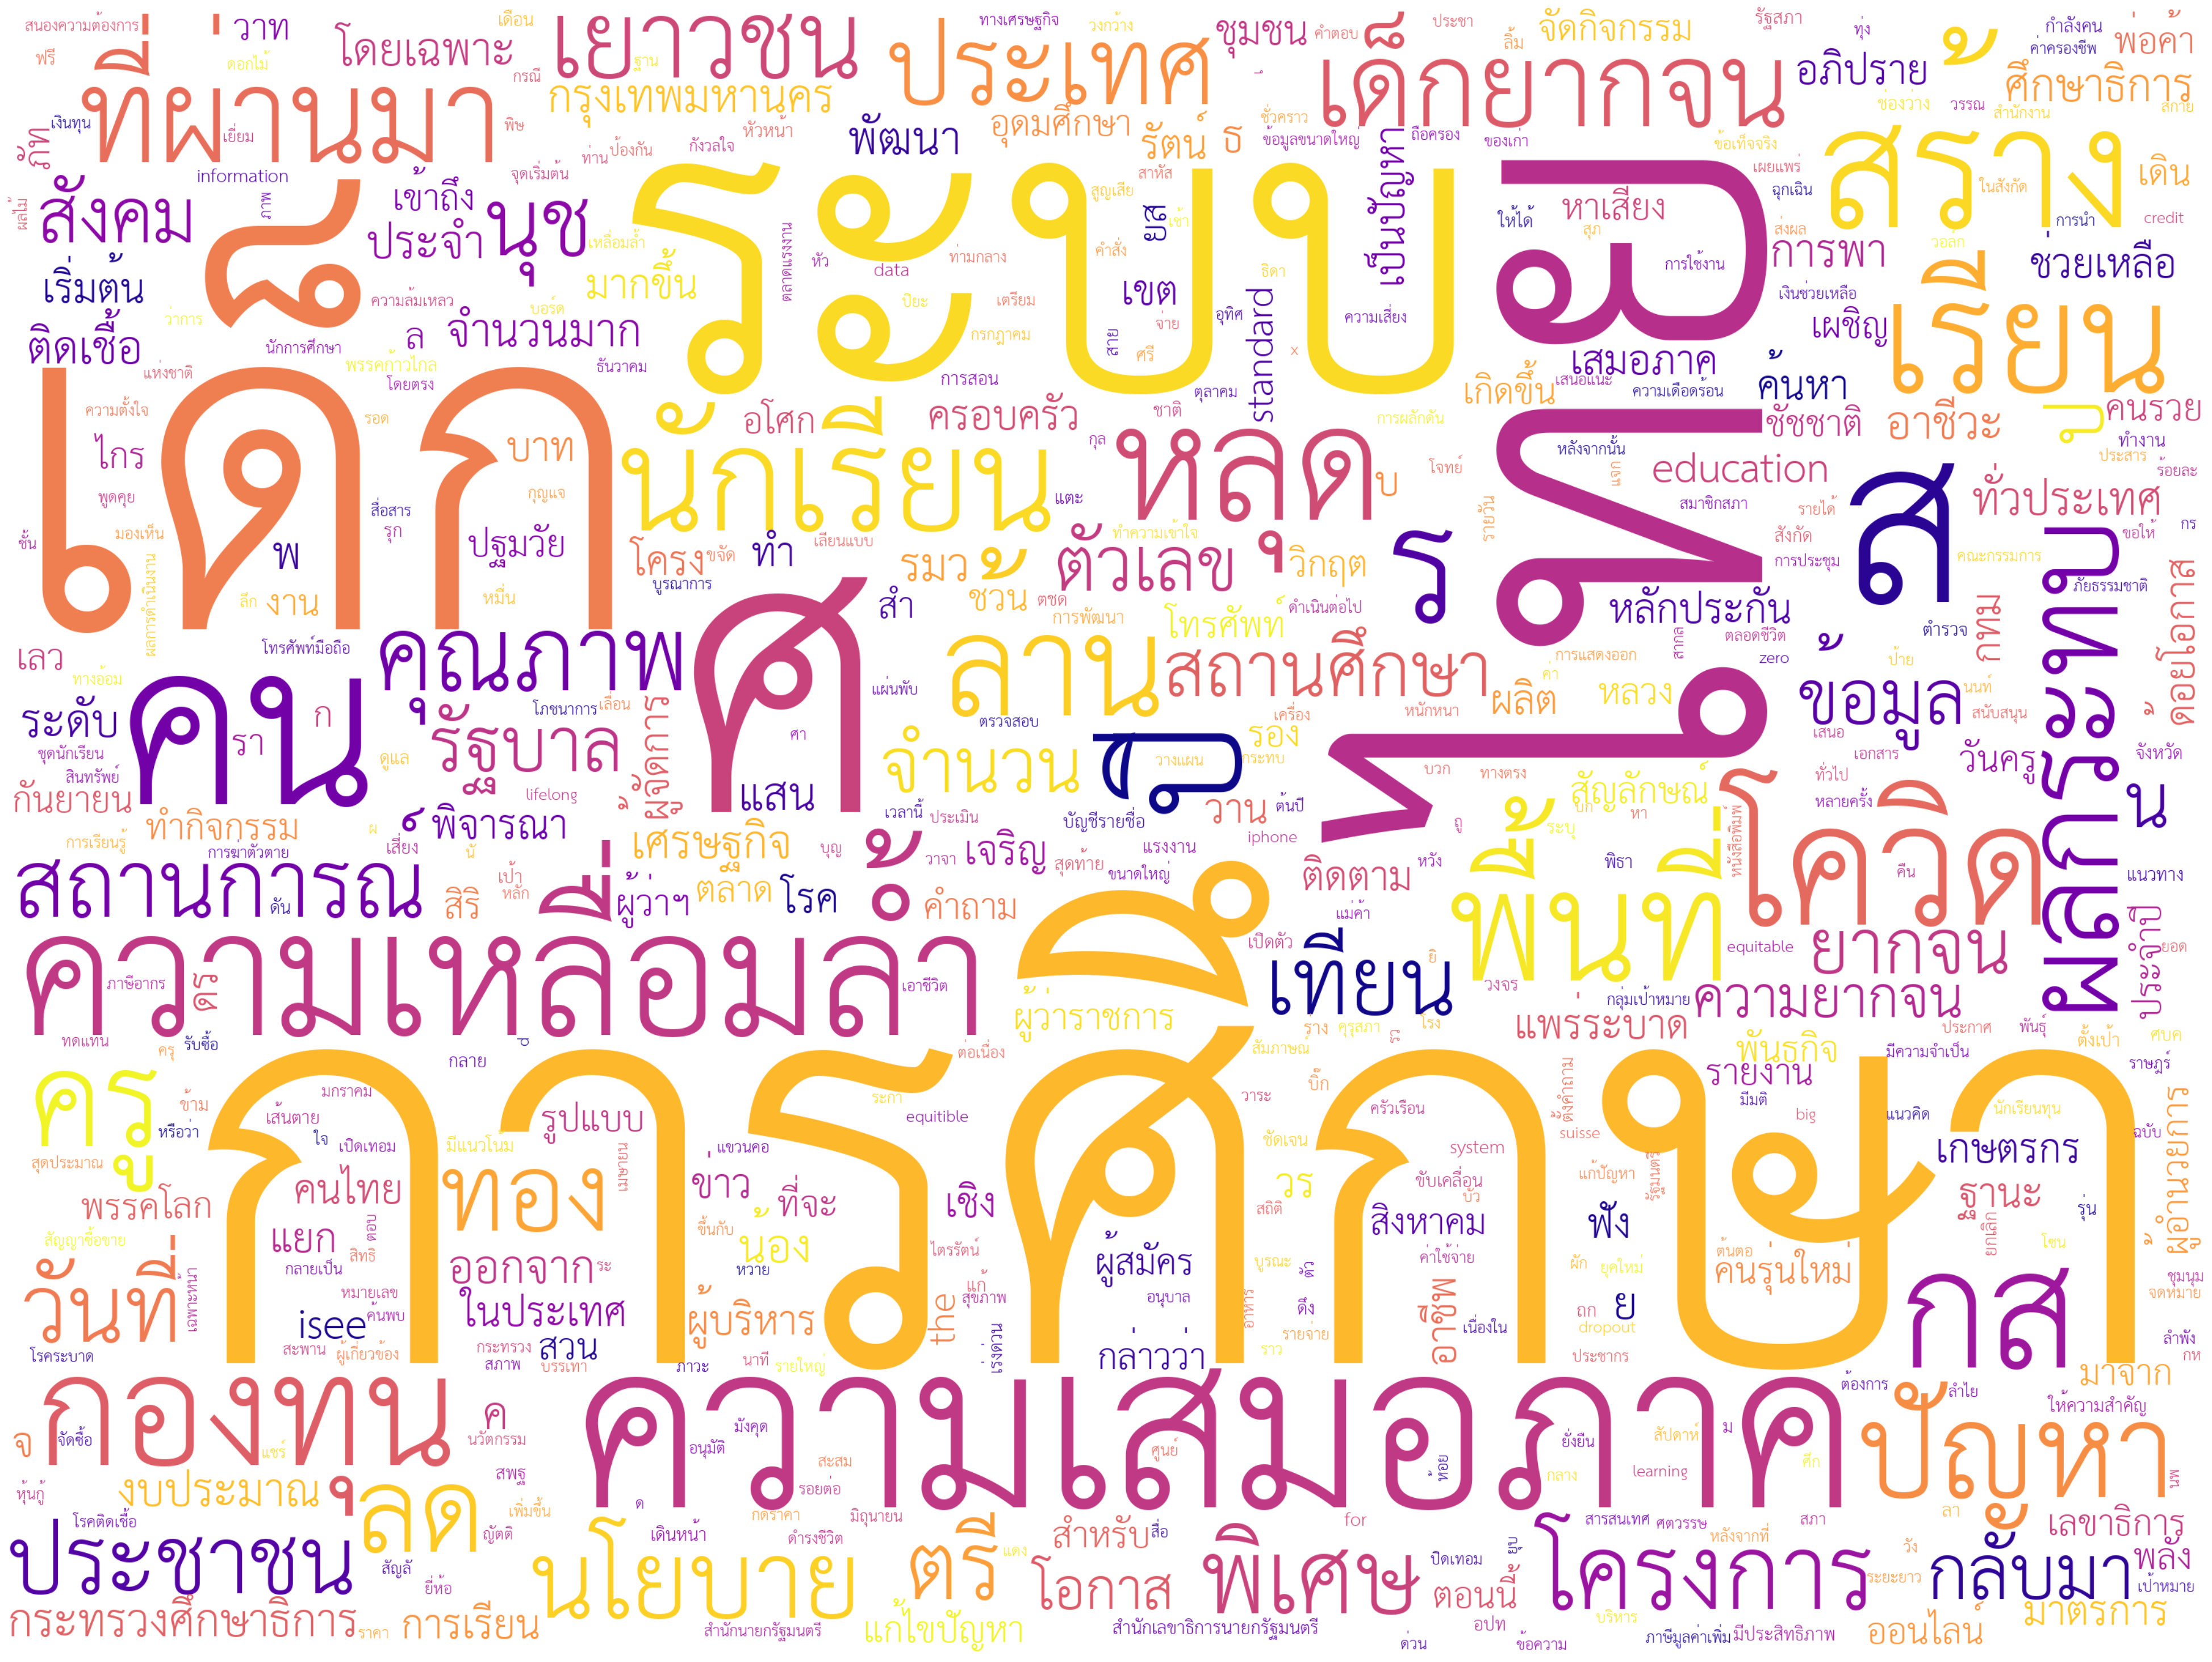

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(50, 50))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [40]:
fig.savefig('wordcloud.png')